Basic Data Visualizations Using the Iris Flower Dataset. 

In [2]:
#This tutorial was adapted from Zach Gold and Ben Hamner via Kaggle. The examples have been modified to match the teaching objectives of this lecture

#We will be using pandas for loading the csv file into a dataframe
import pandas as pd

#matplotlib is a python library for basic graph plotting
import matplotlib.pyplot as plt

#seaborn is another python graphing library that is built upon matplotlib and allows you to optimize matplotlib's output
import seaborn as sns 

#switching from matplotlib's default graphing style to that of seaborn's. Seaborn displays graph lines, matplotlib doesn't
sns.set(color_codes = True)

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

Loading the csv file into the pandas dataframe

In [37]:
flowers = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [38]:
flowers

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Taking a peek at the dataset

In [39]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Finding how many records we have for each species 


In [40]:
flowers["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Making a scatterplot from using methods from within pandas! No need for matplotlib or seaborn!


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


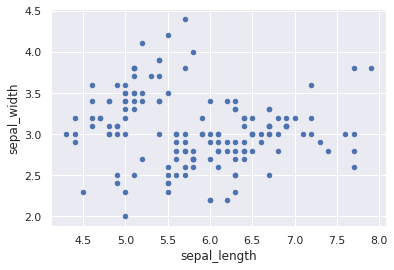

In [41]:
flowers.plot(kind='scatter', x = 'sepal_length', y = 'sepal_width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


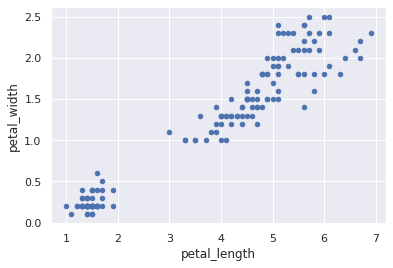

In [42]:
flowers.plot(kind='scatter', x = 'petal_length', y = 'petal_width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


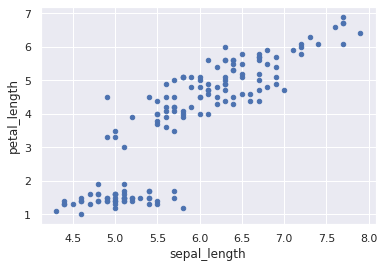

In [43]:
#plot sepal length vs petal length
flowers.plot(kind='scatter', x = 'sepal_length', y = 'petal_length')

Let's use seaborn to creating a jointplot with bivariate scatterplots and histograms within the same figure.


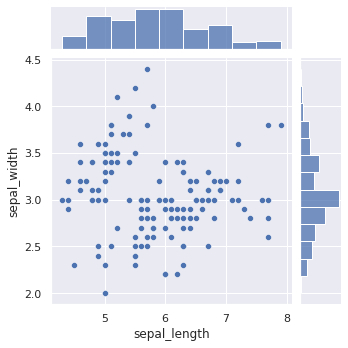

In [44]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = flowers, size =5)

The previous scatterplots do not differentiate among the species. Let's use seaborn' FacetGrid to indicate which points belong to the various species. 

hue - represents the column which we wish to give each unique record a different color

palette - represents the color scheme that is used.

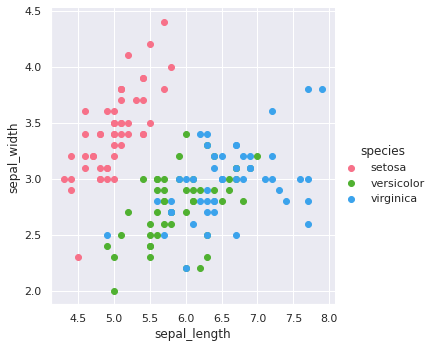

In [45]:
sns.FacetGrid(flowers, hue='species', palette='husl', size=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

Experiment with different color palettes. Check out the seaborn documentation here: https://seaborn.pydata.org/tutorial/color_palettes.html

Let's create a boxplot!

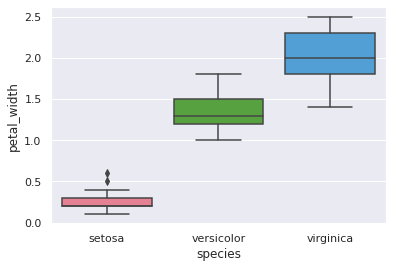

In [46]:
sns.boxplot(x='species', y='petal_width', palette='husl', data=flowers)


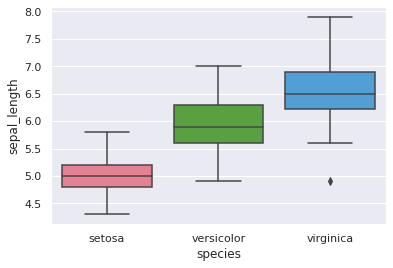

In [47]:
sns.boxplot(x='species', y ='sepal_length', palette='husl', data = flowers)

How about a violin plot?! Violin plots show the density of the data at various primary splits. The denser sections are thicker than the sparse ones.

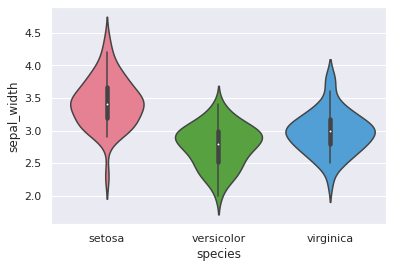

In [48]:
sns.violinplot(x='species', y='sepal_width', palette='husl', data=flowers)


Violin plot with the datapoints overlayed on the figures. This gives us a better idea of the data distribution. 

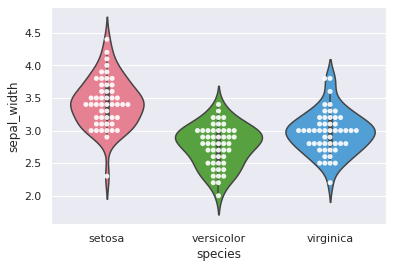

In [16]:
#plotting a violin plot
sns.violinplot(x= 'species', y='sepal_width', palette='husl', data=data)

#plotting a swarm plot on top of the violin plot
sns.swarmplot(x='species', y='sepal_width', data=data, color='w', alpha=.9);


Kdeplot - great for looking at univariate relations. This visualizes the kernel density estimate of the underlying feature. The higher a line on the y-axis, the denser the data is at that x-axis number

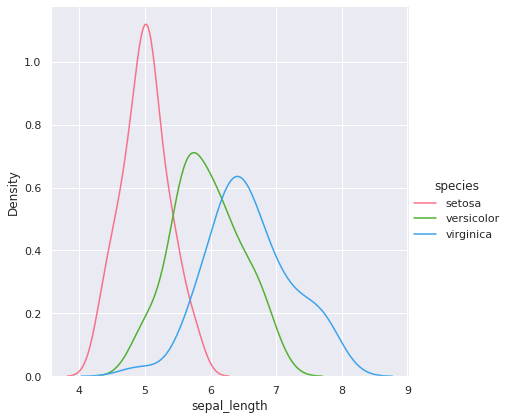

In [50]:
sns.FacetGrid(flowers, hue='species', palette='husl', size=6).map(sns.kdeplot, 'sepal_length').add_legend()

Pairplot - depicts the bivariate relation between each pair of features. 

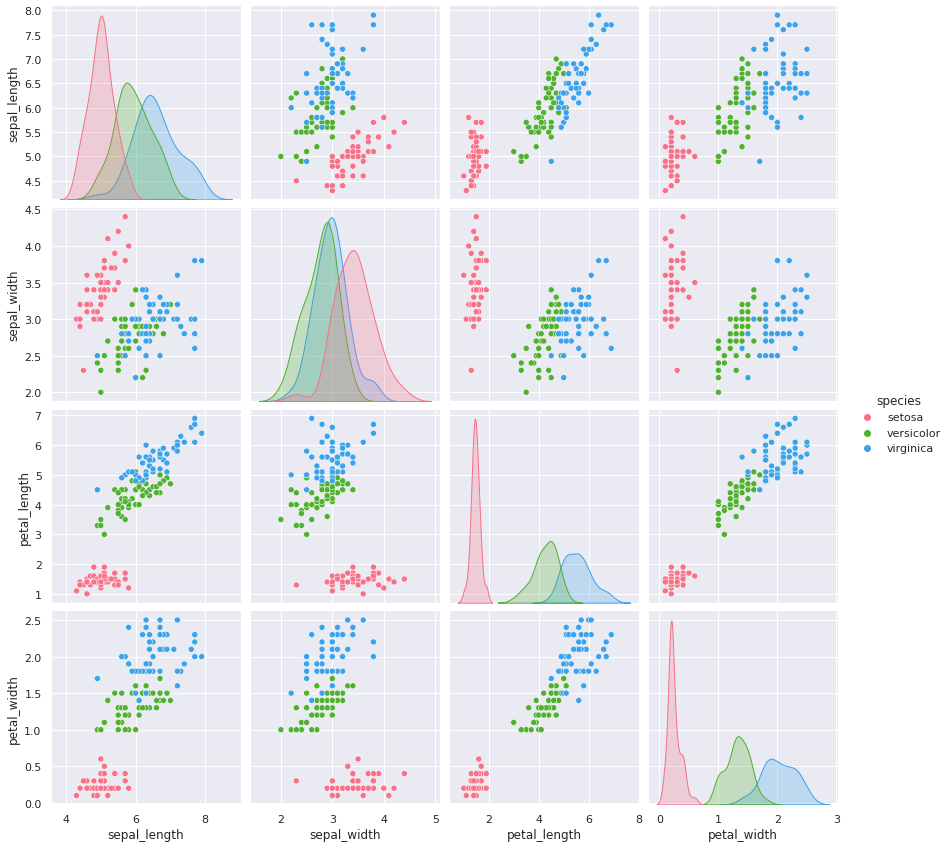

In [51]:
sns.pairplot(flowers, hue='species', palette='husl', size=3)


By default, a pairplot shows a similar figure by default along the diagonal. We can modify it to show other plots such as a kde.

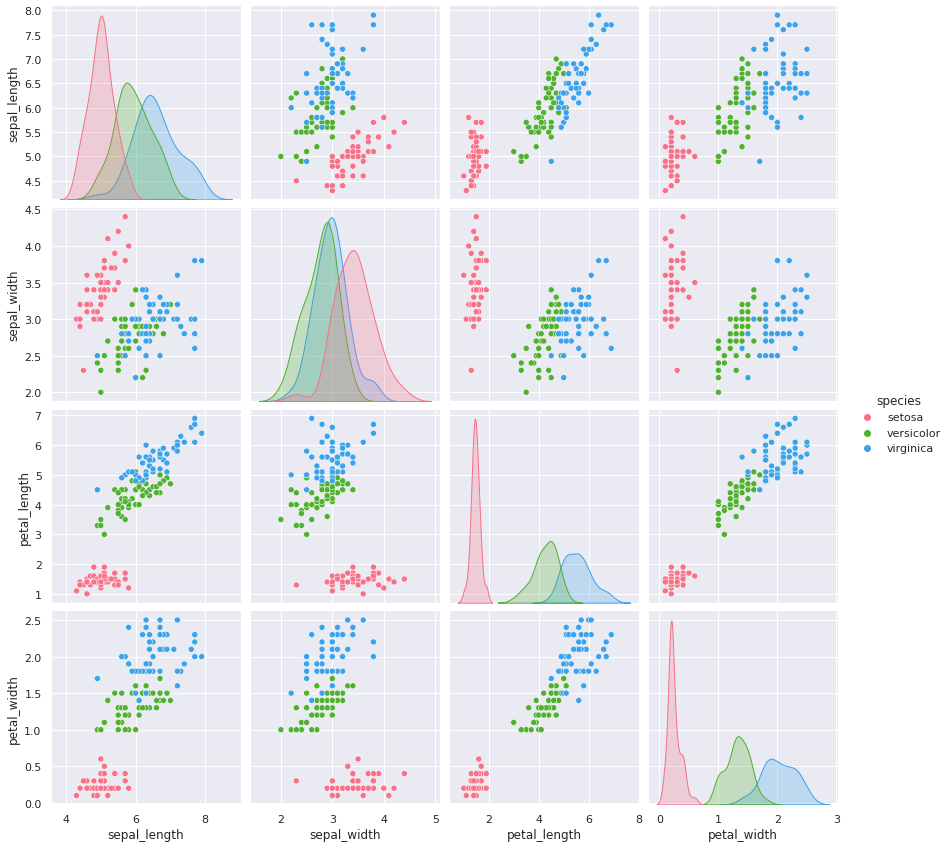

In [52]:
sns.pairplot(flowers, hue='species', palette='husl', size=3, diag_kind='kde')


As we have seen earlier, we can create plots from with Pandas itself. Let's explore some more!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc984075bd0>,
      dtype=object)

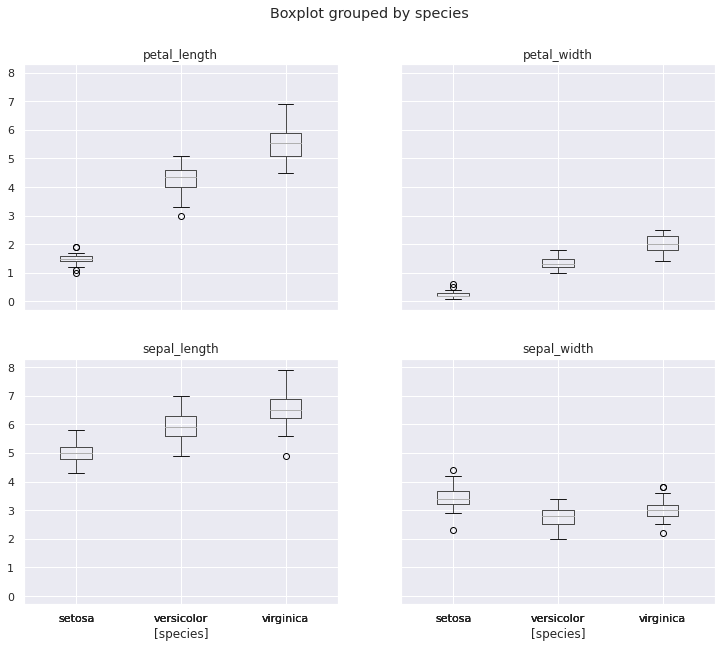

In [53]:
#boxplot - via pandas

flowers.boxplot(by='species', figsize=(12, 10))


Parallel Coordinates allows us to see each feature in a separate column and the connecting features for each data sample

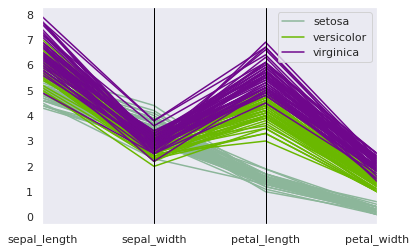

In [54]:

from pandas.plotting import parallel_coordinates
parallel_coordinates(flowers, 'species')